# Import library dan csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

In [2]:
raw_data = pd.read_csv('epl_1819.csv')

# Preprocessing

## Melakukan pemeriksaan 5 baris pertama

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(raw_data.head())

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


## Memeriksa sebaran data

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(raw_data.describe(include = 'all'))

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20,20,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20,20.000000,20,20,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20,20.000000,20.000000,20.000000,20.000000
unique,20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN
top,Crystal Palace,No UEFA Competitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"17,219",NaN,"2,552","2,249",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785,NaN,NaN,NaN,NaN
freq,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,53.450000,25.250000,27.490000,17.450000,3.750362e+08,1.498508e+07,NaN,58.700000,NaN,NaN,666.650000,195.350000,481.650000,165.550000,9.300000,4.200000,46.400000,7.250000,61.100000,2.350000,3.350000,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,NaN,429.400000,5.350000,49.995000,78.310000
std,NaN,NaN,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,21.007455,1.802776,0.938588,4.071402,2.821444e+08,1.127381e+07,NaN,33.625022,NaN,NaN,75.524325,34.776391,78.333481,39.323858,3.934998,2.546411,16.044018,4.165965,10.557611,1.424411,2.433862,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,NaN,84.536756,2.109502,6.387692,5.866129
min,NaN,NaN,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,16.000000,20.000000,26.100000,10.000000,8.549200e+07,3.053600e+06,NaN,15.000000,NaN,NaN,562.000000,140.000000,360.000000,108.000000,4.000000,1.000000,17.000000,1.000000,38.000000,0.000000,0.000000,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,NaN,246.000000,1.000000,39.100000,63.900000
25%,NaN,NaN,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,39.750000,25.000000,26.800000,15.500000,1.723480e+08,6.747400e+06,NaN,34.500000,NaN,NaN,612.500000,174.750000,440.000000,145.000000,6.500000,2.000000,38.500000,4.750000,55.750000,1.000000,1.000000,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,NaN,390.250000,4.750000,46.300000,75.550000
50%,NaN,NaN,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,51.000000,25.500000,27.250000,18.000000,2.317260e+08,9.935200e+06,NaN,50.500000,NaN,NaN,640.500000,193.500000,472.000000,159.500000,9.500000,4.000000,44.000000,7.000000,59.500000,2.000000,3.000000,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,NaN,445.000000,5.000000,48.350000,78.150000
75%,NaN,NaN,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,67.000000,26.000000,28.150000,20.000000,5.8

## Memeriksa missing value dan tipe data

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

## Membuat salinan data mentah

In [6]:
data = raw_data.copy()

## Mengganti tipe data yang salah

In [7]:
#membuat fungsi penggantian tipe data
def replace(columns):
    for column in columns:
        data[column] = data[column].str.replace(',','')
        data[column] = data[column].astype('int64')

In [8]:
columns_replace = ['attack_passes', 'attack_passes_long', 'attack_passes_back', 'defence_clearances']
replace(columns_replace)

# Memeriksa distribusi poin dan mencari outlier

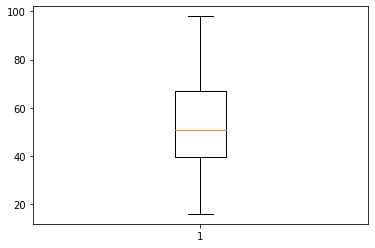

In [9]:
plt.boxplot(raw_data['general_points'])
plt.show()

# Mencari tim dengan serangan terbaik

In [10]:
#mengambil variabel serangan
attack_columns = []
for column in data.columns:
    if 'attack' in column:
        attack_columns.append(column)

attack_normalize = data.loc[:, attack_columns]

In [11]:
#melakukan normalisasi data
attack_normalize = pd.DataFrame(normalize(attack_normalize, axis = 0), columns = attack_normalize.columns)

In [12]:
#menghitung nilai serangan
data['attack_total'] = attack_normalize.sum(axis = 1)

In [13]:
data[data['attack_total'] == data['attack_total'].max()].loc[:, ['Team']+attack_columns+['attack_total']]

,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,attack_total
0,Manchester City,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0,5.123689


# Mencari tim dengan pertahanan terbaik

In [14]:
#mengambil variabel pertahanan
defence_columns = []
for column in data.columns:
    if 'defence' in column:
        defence_columns.append(column)

defence_normalize = data.loc[:, defence_columns]

In [15]:
#melakukan modifikasi variabel
defence_normalize['defence_goals_conceeded'] = 1/defence_normalize['defence_goals_conceeded']
defence_normalize['defence_penalty_conceeded'] = 1/defence_normalize['defence_penalty_conceeded']

In [16]:
#melakukan normalisasi data
defence_normalize = pd.DataFrame(normalize(defence_normalize, axis = 0), columns = defence_normalize.columns)

In [17]:
#menghitung nilai pertahanan
data['defence_total'] = defence_normalize.sum(axis = 1)

In [18]:
data[data['defence_total'] == data['defence_total'].max()].loc[:, ['Team']+defence_columns+['defence_total']]

,Team,defence_goals_conceeded,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,defence_total
1,Liverpool,22,76,78,314,610,2,639,317,1,2.265031


# Mencari tim dengan finansial terbaik

In [19]:
#mengambil variabel finansial
finance_columns = []
for column in data.columns:
    if 'finance' in column:
        finance_columns.append(column)

finance_normalize = data.loc[:, finance_columns]

In [20]:
#melakukan normalisasi data
finance_normalize = pd.DataFrame(normalize(finance_normalize, axis = 0), columns = finance_normalize.columns)

In [21]:
#menghitung nilai finansial
data['finance_total'] = finance_normalize.sum(axis = 1)

In [22]:
data[data['finance_total'] == data['finance_total'].max()].loc[:, ['Team']+finance_columns+['finance_total']]

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average,finance_total
0,Manchester City,26,150986355,1003200000,39987200,1.553042
